In [13]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Program Files\Python39\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-qgsisuct\\sklearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-qgsisuct\\sklearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-lw25iek2'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-qgsisuct\sklearn\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'pip install sklearn'
    - replace 'sklearn' by 'scikit-learn' in your pip requireme

In [2]:
import requests
from bs4 import BeautifulSoup
import lxml
import pandas as pd
import numpy as np
import json
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
import numpy.random as npr

from mpl_toolkits.mplot3d import Axes3D
from pandas import *
from numpy.random import randn
from pylab import *
import scipy.stats as sps
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

NULL ЗНАЧЕНИЯ

<Axes: >

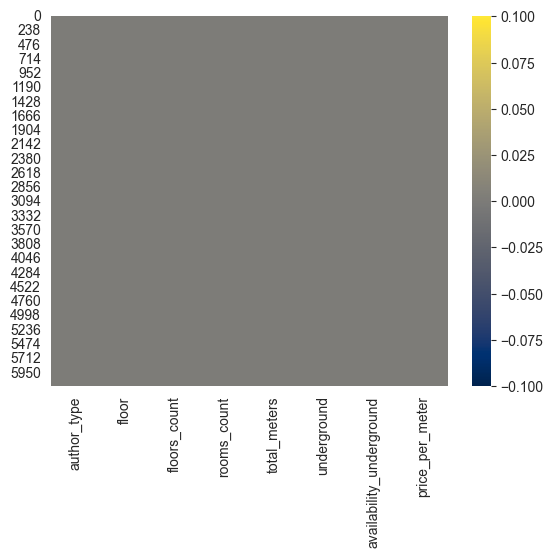

In [24]:
import pandas as pd
import seaborn as sns

path_base = "base_3.csv"

df = pd.read_csv(path_base)
sns.heatmap(df.isnull(),cmap='cividis')

ВЫБРОСЫ

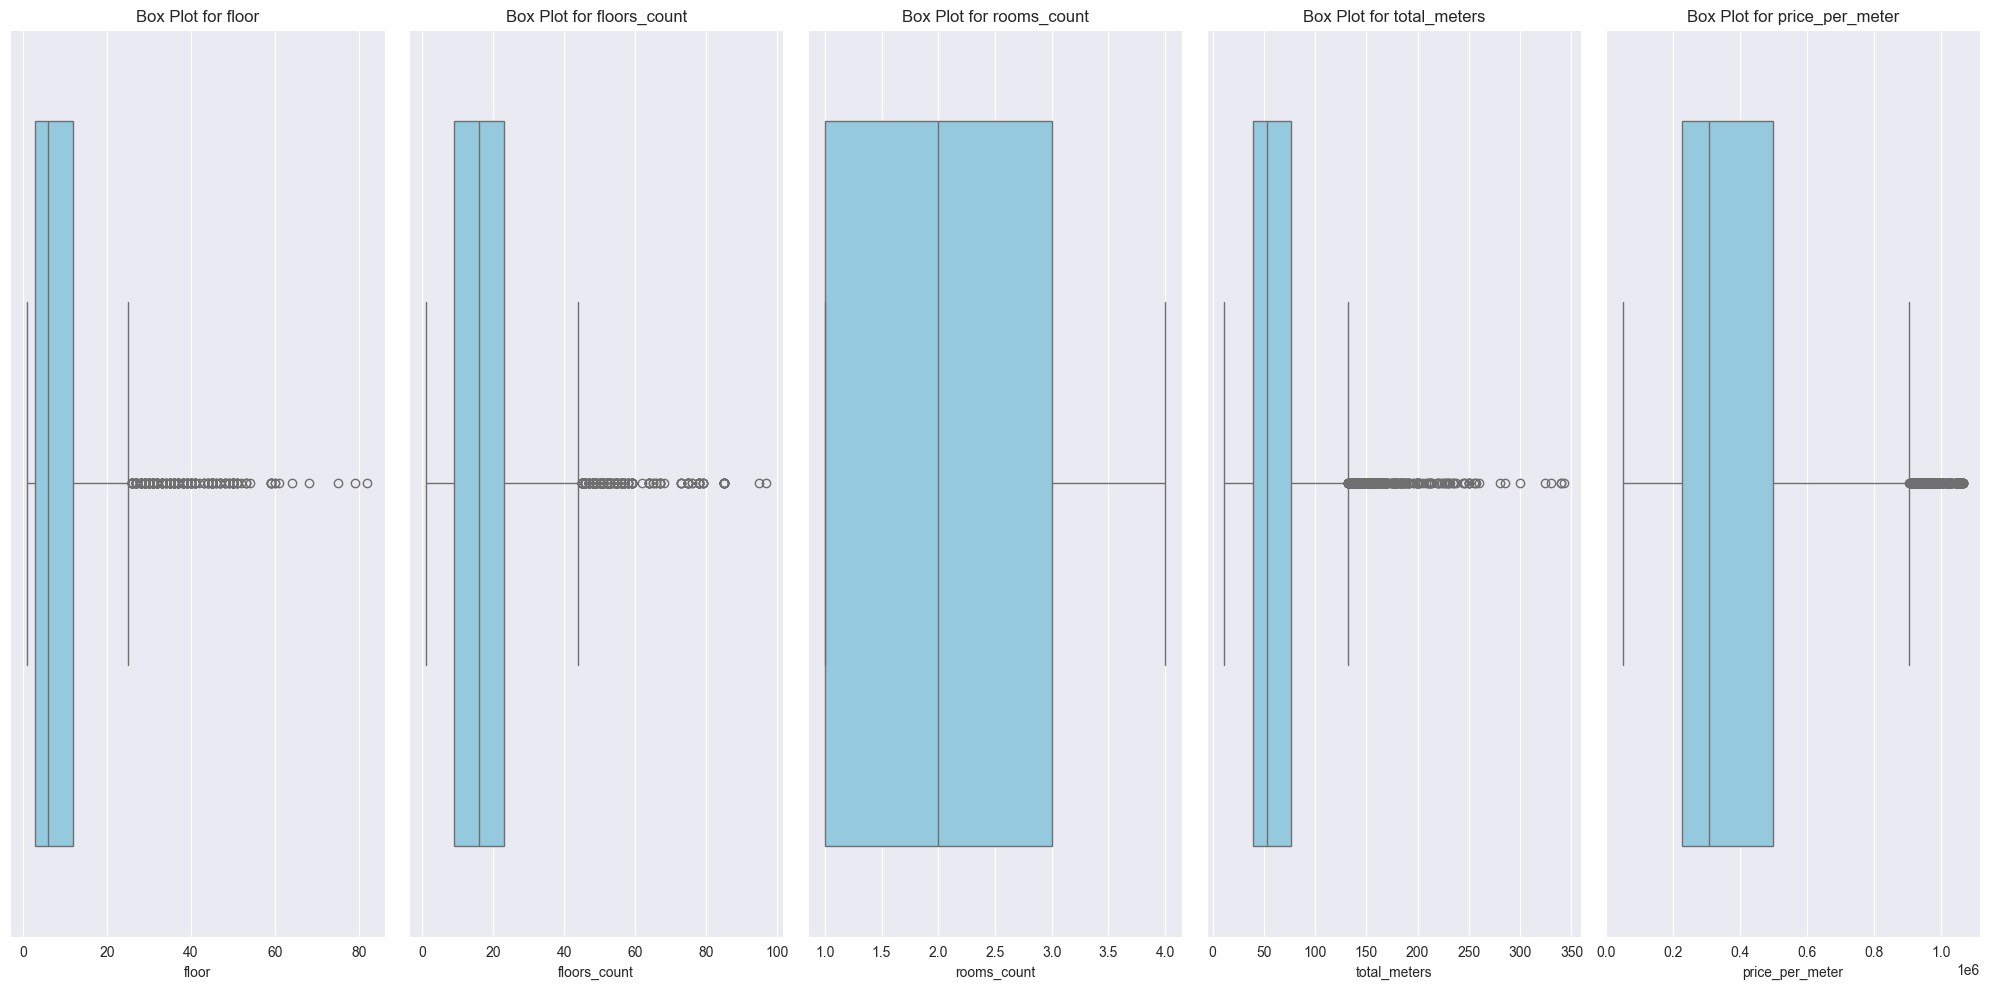

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

path_base = "base_3.csv"

data = pd.read_csv(path_base)
df_setect_out=df[['floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_meter']]
df_setect_out

outlier_cols = []

for column in df_setect_out.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(20, 10))

# Create box plots for each column
for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

ОЧИСТКА ОТ ВЫБРОСОВ


In [55]:
import pandas as pd
import numpy as np

def clean_outliers(df, column_name, method='iqr', threshold=1.5):
   
    if method == 'iqr':
        # Метод межквартильного размаха
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[~((df[column_name] < lower_bound) | (df[column_name] > upper_bound))]
    elif method == 'zscore':
        # Метод z-оценки
        z = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
        df = df[z <= threshold]
    else:
        raise ValueError(f'Неверный метод очистки выбросов: {method}')

    return df

# Пример использования:

# Загрузка данных из файла CSV
df = pd.read_csv('base_3.csv') 

# Очистка выбросов в столбце 'floor' методом межквартильного размаха
df = clean_outliers(df, 'floor', method='iqr', threshold=1)

# Очистка выбросов в столбце 'floor_counts' методом межквартильного размаха
df = clean_outliers(df, 'floors_count', method='iqr', threshold=0.5) 

# Очистка выбросов в столбце 'rooms_count' методом межквартильного размаха
df = clean_outliers(df, 'rooms_count', method='iqr', threshold=0.5) 

# Очистка выбросов в столбце 'total_meters' методом межквартильного размаха
df = clean_outliers(df, 'total_meters', method='iqr', threshold=0.5)

# Очистка выбросов в столбце 'price_per_meter' методом межквартильного размаха
df = clean_outliers(df, 'price_per_meter', method='iqr', threshold=0.5)


# Сохранение очищенных данных в файл CSV
df.to_csv('base_3_cleaned_file.csv', index=False)


ОТОБРАЖЕНИЕ ОЧИЩЕННОГО ФАЙЛА ОТ ВЫБРОСОВ ДАННЫХ


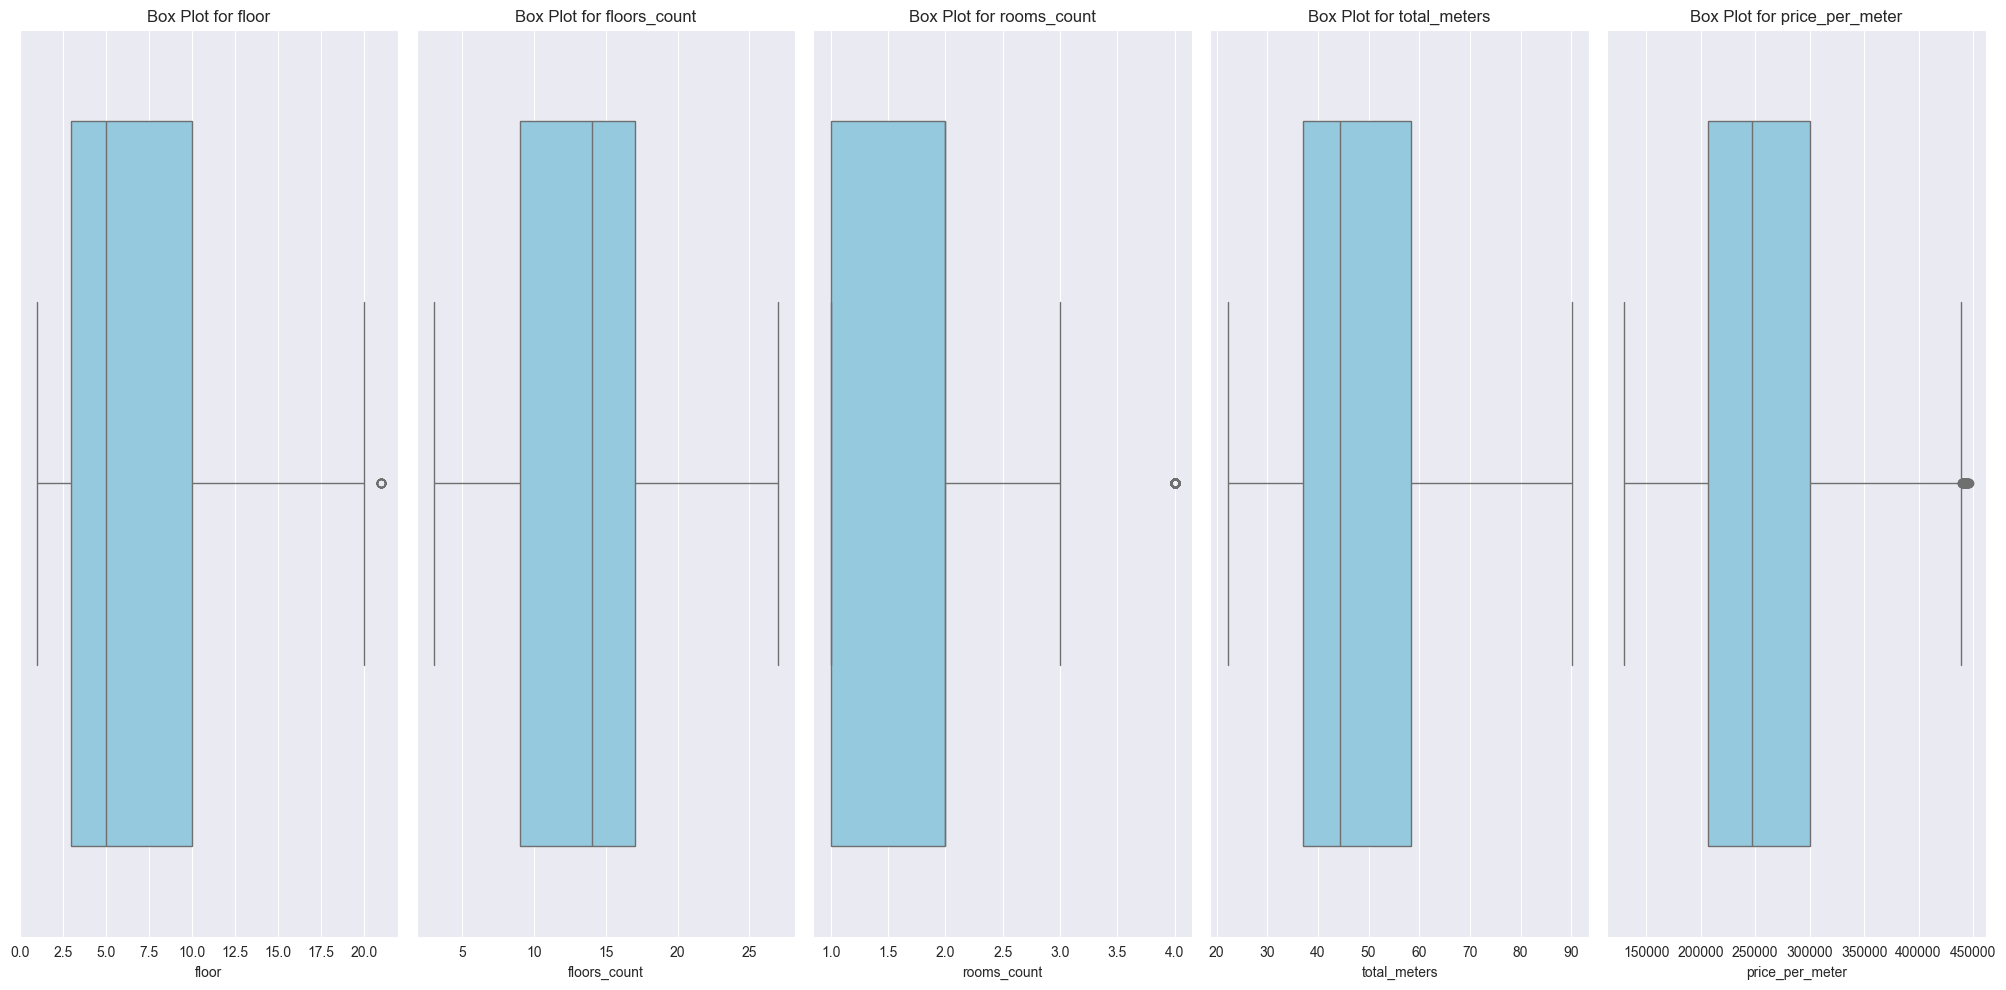

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

path_base = "base_3_cleaned_file.csv"

data = pd.read_csv(path_base)
df_setect_out=df[['floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_meter']]
df_setect_out

outlier_cols = []

for column in df_setect_out.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(20, 10))

# Create box plots for each column
for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

ВИЗУАЛИЗАЦИЯ ДАННЫХ (ПРОДОЛЖЕНИЕ)

In [60]:
import pandas as pd

path_base = "base_3_cleaned_file.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()

author_type
developer                   1840
real_estate_agent           1200
realtor                      155
homeowner                     79
representative_developer      39
unknown                       25
official_representative        5
Name: count, dtype: int64

<Axes: xlabel='author_type', ylabel='count'>

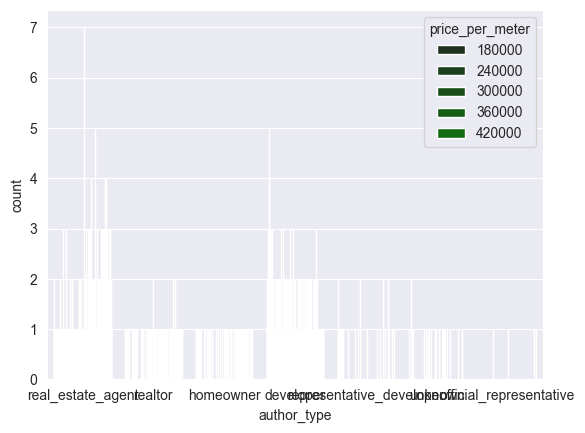

In [61]:
import seaborn as sns

path_base = "base_3_cleaned_file.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()
sns.set_style("darkgrid")
sns.countplot(x='author_type', hue='price_per_meter', data=df,  color='green') 

In [62]:
import pandas as pd

path_base = "base_3_cleaned_file.csv"
df = pd.read_csv(path_base)

df['total_meters'].value_counts()

total_meters
39.00    28
40.00    27
60.00    25
45.00    23
38.00    22
         ..
37.86     1
32.81     1
32.27     1
39.56     1
86.00     1
Name: count, Length: 1046, dtype: int64

<Axes: xlabel='total_meters', ylabel='count'>

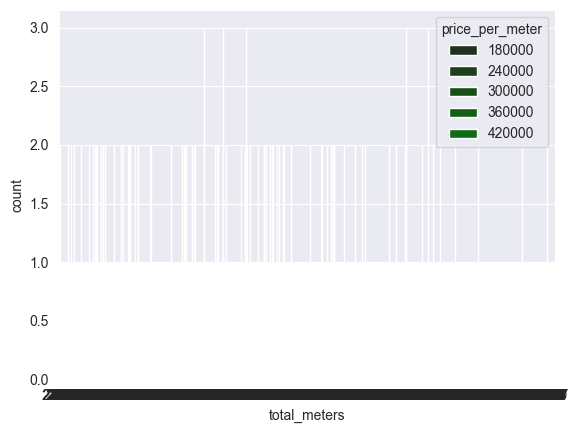

In [63]:
import seaborn as sns

path_base = "base_3_cleaned_file.csv"
df = pd.read_csv(path_base)

df['total_meters'].value_counts()
sns.set_style("darkgrid")
sns.countplot(x='total_meters', hue='price_per_meter', data=df,  color='green') 

ПОСТРОЕНИЕ ДИАГРАММ

СТОЛБЕЦ AUTOR_TYPE

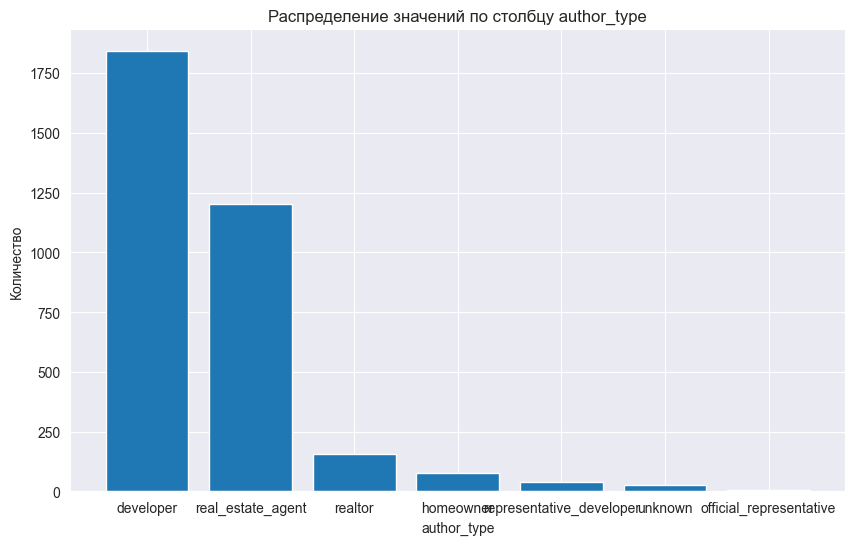

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path_base = "base_3_cleaned_file.csv"
df = pd.read_csv(path_base)

# Выбираем столбец для столбчатой диаграммы
column_for_bar = 'author_type' 

# Группируем данные по выбранному столбцу
grouped_data = df[column_for_bar].value_counts()

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values) # Создание столбцов
plt.title(f'Распределение значений по столбцу {column_for_bar}')
plt.xlabel(column_for_bar)
plt.ylabel('Количество')
plt.show()



КОЛИЧЕСТВО КОМНАТ, ЭТАЖЕЙ, НАЛИЧИЕ МЕТРО

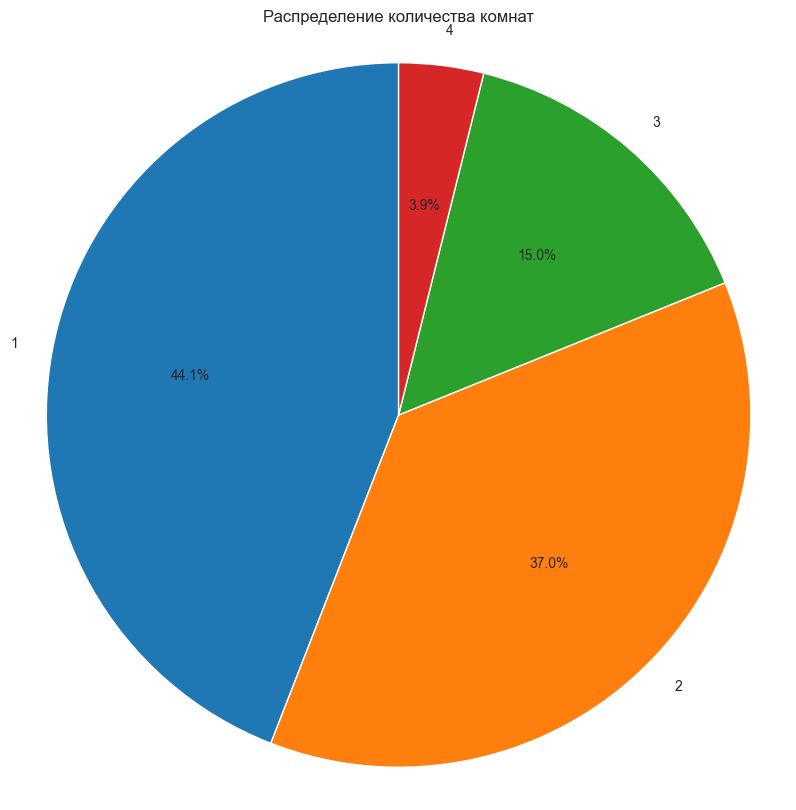

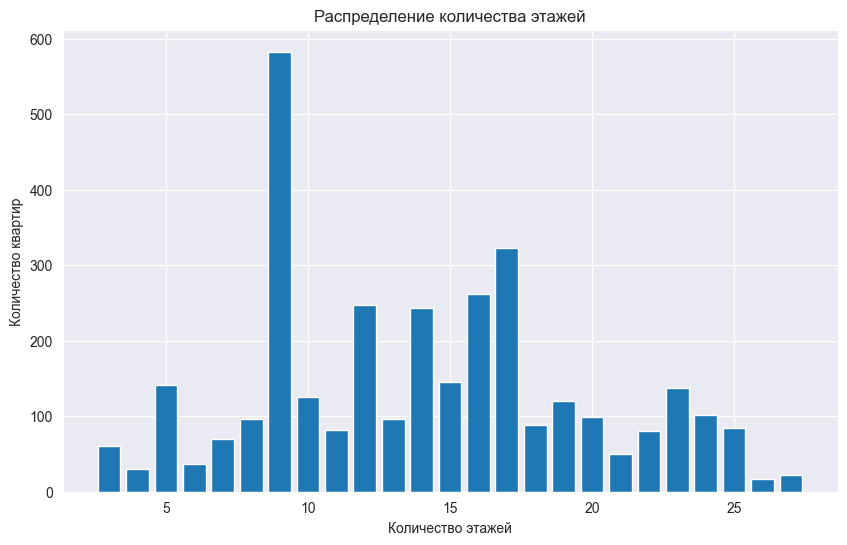

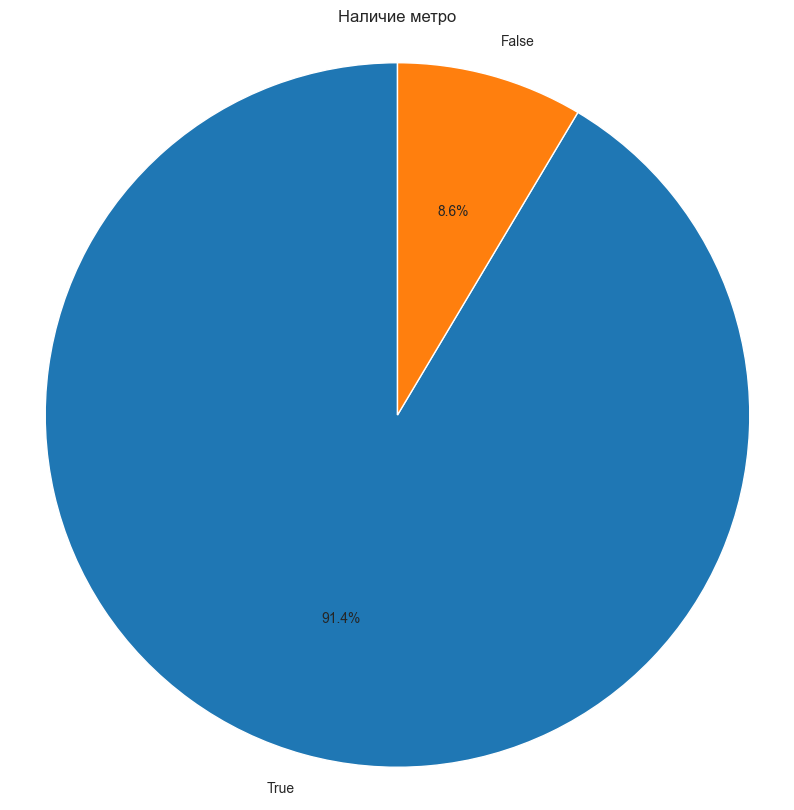

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path_base = "base_3_cleaned_file.csv"
df = pd.read_csv(path_base)

# Круговая диаграмма для 'rooms_count'
rooms_counts = df['rooms_count'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(rooms_counts, labels=rooms_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение количества комнат')
plt.axis('equal') 
plt.show()


# Подсчет количества квартир по количеству этажей
floors_counts = df['floors_count'].value_counts()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(floors_counts.index, floors_counts.values) # Создание столбцов
plt.title('Распределение количества этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

# Круговая диаграмма для 'availability_underground'
availability_underground_counts = df['availability_underground'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(availability_underground_counts, labels=availability_underground_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Наличие метро')
plt.axis('equal') 
plt.show()


ПОСТРОЕНИЕ ГРАФИКОВ ЗАВИСИМОСТИ


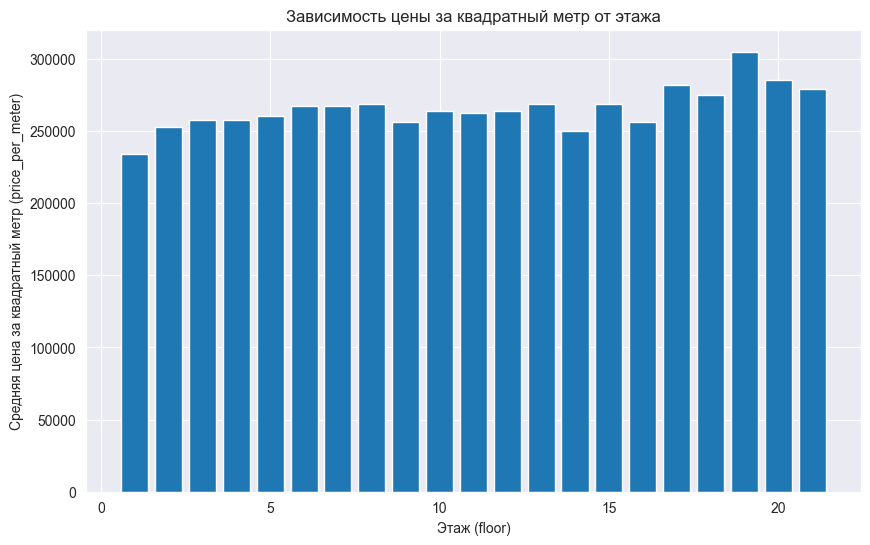

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
df = pd.read_csv('base_3_cleaned_file.csv') # Замените 'your_data.csv' на имя вашего файла

# Группировка данных по этажу и вычисление средней цены за квадратный метр
grouped_data = df.groupby('floor')['price_per_meter'].mean()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6)) # Установка размера диаграммы
plt.bar(grouped_data.index, grouped_data.values) # Создание столбцов
plt.xlabel('Этаж (floor)') # Название оси X
plt.ylabel('Средняя цена за квадратный метр (price_per_meter)') # Название оси Y
plt.title('Зависимость цены за квадратный метр от этажа') # Заголовок диаграммы

# Отображение диаграммы
plt.show()


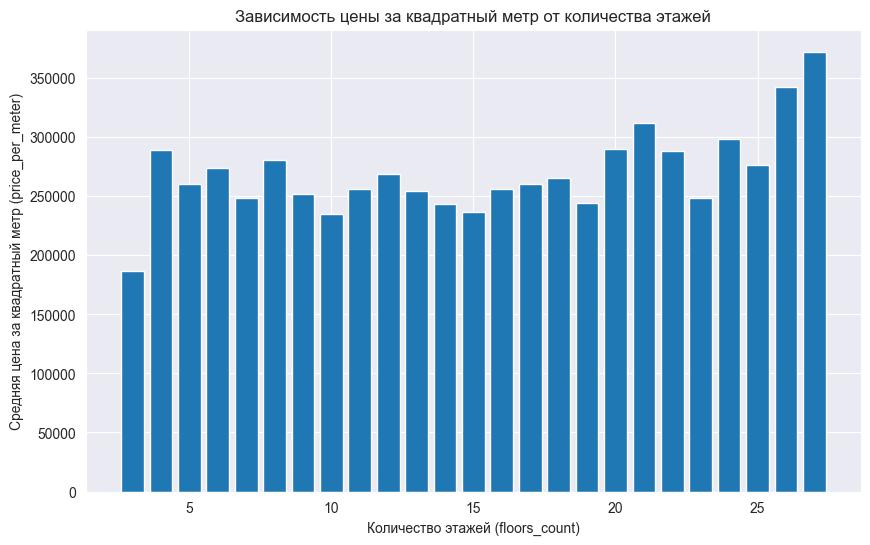

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
df = pd.read_csv('base_3_cleaned_file.csv') # Замените 'your_data.csv' на имя вашего файла

# Группировка данных по этажу и вычисление средней цены за квадратный метр
grouped_data = df.groupby('floors_count')['price_per_meter'].mean()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6)) # Установка размера диаграммы
plt.bar(grouped_data.index, grouped_data.values) # Создание столбцов
plt.xlabel('Количество этажей (floors_count)') # Название оси X
plt.ylabel('Средняя цена за квадратный метр (price_per_meter)') # Название оси Y
plt.title('Зависимость цены за квадратный метр от количества этажей') # Заголовок диаграммы

# Отображение диаграммы
plt.show()


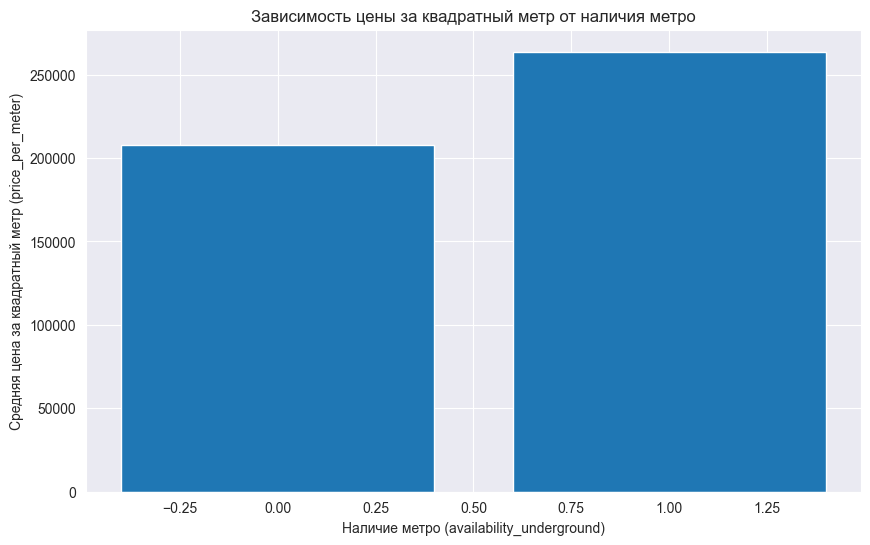

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
df = pd.read_csv('base_3_cleaned_file.csv') # Замените 'your_data.csv' на имя вашего файла

# Группировка данных по этажу и вычисление средней цены за квадратный метр
grouped_data = df.groupby('availability_underground')['price_per_meter'].mean()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6)) # Установка размера диаграммы
plt.bar(grouped_data.index, grouped_data.values) # Создание столбцов
plt.xlabel('Наличие метро (availability_underground)') # Название оси X
plt.ylabel('Средняя цена за квадратный метр (price_per_meter)') # Название оси Y
plt.title('Зависимость цены за квадратный метр от наличия метро') # Заголовок диаграммы

# Отображение диаграммы
plt.show()

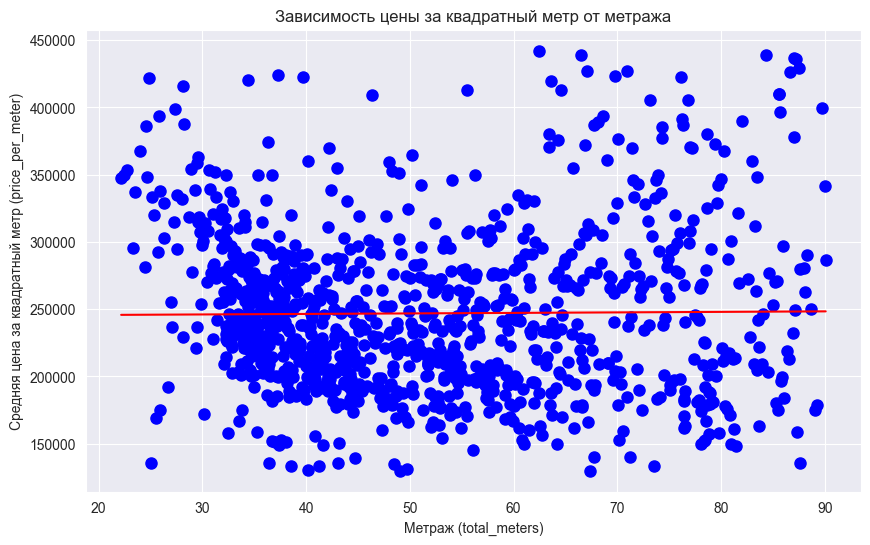

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из CSV-файла
df = pd.read_csv('base_3_cleaned_file.csv') # Замените 'your_data.csv' на имя вашего файла

# Группировка данных по этажу и вычисление средней цены за квадратный метр
grouped_data = df.groupby('total_meters')['price_per_meter'].mean()

# Создание диаграммы в виде точек
plt.figure(figsize=(10, 6)) # Установка размера диаграммы
plt.plot(grouped_data.index, grouped_data.values, 'o', markersize=8, color='blue') # Создание точек
plt.xlabel('Метраж (total_meters)') # Название оси X
plt.ylabel('Средняя цена за квадратный метр (price_per_meter)') # Название оси Y
plt.title('Зависимость цены за квадратный метр от метража') # Заголовок диаграммы

# Добавление линии тренда
plt.plot(grouped_data.index, np.poly1d(np.polyfit(grouped_data.index, grouped_data.values, 1))(grouped_data.index), 'r-')

# Отображение диаграммы
plt.show()

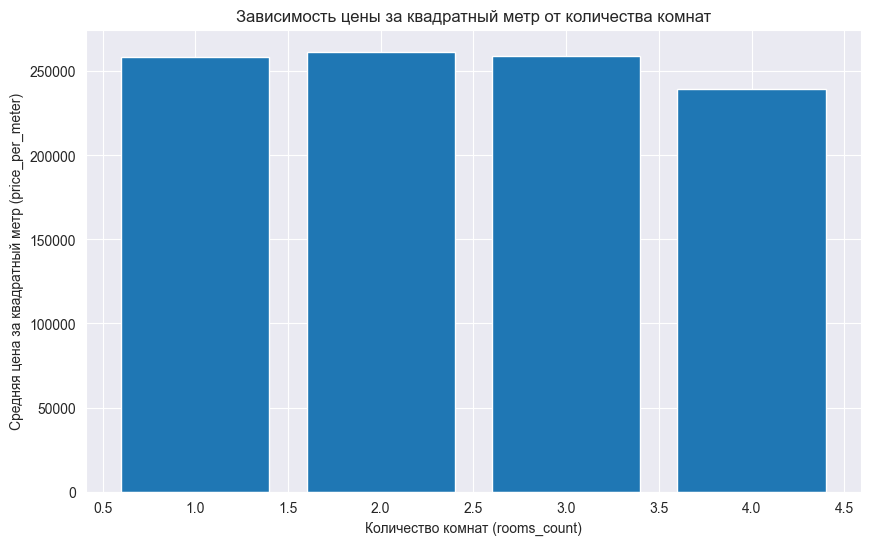

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
df = pd.read_csv('base_3_cleaned_file.csv') # Замените 'your_data.csv' на имя вашего файла

# Группировка данных по этажу и вычисление средней цены за квадратный метр
grouped_data = df.groupby('rooms_count')['price_per_meter'].mean()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6)) # Установка размера диаграммы
plt.bar(grouped_data.index, grouped_data.values) # Создание столбцов
plt.xlabel('Количество комнат (rooms_count)') # Название оси X
plt.ylabel('Средняя цена за квадратный метр (price_per_meter)') # Название оси Y
plt.title('Зависимость цены за квадратный метр от количества комнат') # Заголовок диаграммы

# Отображение диаграммы
plt.show()